# ML Group Work Project 1 24/05 632 MACHINE LEARNING IN FINANCE

Group no. : 6200
members:


*   Boyan Davidov

*   Ivan Shigolakov

*   Bharat Swami





# **Classification trees**

## **Step 1**

#### *Basics:*

Classification tree is a map of binary decisions leading to a decision about a class or label. In other words, it is a series of if-then rules.

#### *Keywords:*

Decision tree, classification tree, DecisionTreeClassifier

## **Step 2**

#### *Advantages:*

- The classification trees models have common feature: their results can be easily explained to other people (non-experts).
- The classification tree can be plotted and hence easily interpreted.
- Another good feature is that such models can devide the data non-linearly when searching for best trees (in comparison with some linear models).
- The model can use qualitative features without say one-hot-encoding or ordinary-incoding the features.

#### *Computation:*

For simplisity we will use dataset about diagnisis with several features (Kaggle).

In [35]:
# Importing the libraries
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd


data = pd.read_csv('/content/diagnosed_cbc_data.csv')
data.head()

WBC  LYMp  NEUTp  LYMn  NEUTn   RBC  HGB    HCT   MCV   MCH  MCHC    PLT  \
0  10.0  43.2   50.1   4.3    5.0  2.77  7.3   24.2  87.7  26.3  30.1  189.0   
1  10.0  42.4   52.3   4.2    5.3  2.84  7.3   25.0  88.2  25.7  20.2  180.0   
2   7.2  30.7   60.7   2.2    4.4  3.97  9.0   30.5  77.0  22.6  29.5  148.0   
3   6.0  30.2   63.5   1.8    3.8  4.22  3.8   32.8  77.9  23.2  29.8  143.0   
4   4.2  39.1   53.7   1.6    2.3  3.93  0.4  316.0  80.6  23.9  29.7  236.0   

    PDW   PCT                      Diagnosis  
0  12.5  0.17  Normocytic hypochromic anemia  
1  12.5  0.16  Normocytic hypochromic anemia  
2  14.3  0.14         Iron deficiency anemia  
3  11.3  0.12         Iron deficiency anemia  
4  12.8  0.22  Normocytic hypochromic anemia

In [36]:
# Splitting the data into predictors and target
target = data["Diagnosis"]
features = data.drop(columns=["Diagnosis"])

# Create a model
model = DecisionTreeClassifier(criterion="gini", max_depth=3, min_samples_leaf=30)

# Train the model
model = model.fit(features, target)

#### *Disadvantages:*

- The predictive power of classification trees is not so good in comparison to other classification methods
- These model can be very non-robust

#### *Equations:*

The algorithm is base on two steps:
- Division of a feature space X = {$X_1, X_2, X_3, ... X_p$} into n different and non-overlapping small sets $R_1, R_2, R_3,..., R_n$
- Splitting the space so that the cost funtion is minimized: for classification tree we are using the Gini impurity or entropy which evaluation the quality of each split:
 - Gini impurity: G = 1 - $\sum_k(p_k)^2$
 - Entropy: D = $-\sum_{k=1}^{K}p_{mk}log(p_{mk})$

- For each split the predicted response is the most commonly occuring class.

#### *Features:*

- The model can be used to get only qualitative results
- Resembles the human desicion-making process (reasoning, logic)
- Ability to handle numerical and categorical data
- Dealing with missing values and nonlinear relationships
- Robust to outliers

#### *Guide:*

The classification tree model takes two arrays as inputs:
- An array X (training set or predictors) with the size of (N samples, M features)
- Array Y (labels for training set) with the size of N samples

The output of the model:
- Decision tree, probability array

#### *Hyperparameters:*

- Gini index, entropy (information gain) (Criteria)
- Maximum depth the tree can grow (max_depth)
- Minimum number of samples for node-splitting needs (min_samples_split)
- Minimum number of samples at a leaf node (min_samples_leaf)
- Number of features to consider when searching for the best split (max_features)
- Minimum fraction of input samples required at a leaf node (min_weight_fraction_leaf)


#### *Illustration:*

In [37]:
# Downloading the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the data
df = pd.read_csv('/content/diagnosed_cbc_data.csv')
df.tail()

WBC    LYMp   NEUTp     LYMn    NEUTn   RBC   HGB      HCT   MCV   MCH  \
1276  4.40  25.845  77.511  1.88076  5.14094  4.86  13.5  46.1526  80.7  27.7   
1277  5.60  25.845  77.511  1.88076  5.14094  4.85  15.0  46.1526  91.7  31.0   
1278  9.20  25.845  77.511  1.88076  5.14094  4.47  13.1  46.1526  88.7  29.3   
1279  6.48  25.845  77.511  1.88076  5.14094  4.75  13.2  46.1526  86.7  27.9   
1280  8.80  25.845  77.511  1.88076  5.14094  4.95  15.2  46.1526  89.7  30.6   

      MCHC    PLT        PDW      PCT Diagnosis  
1276  34.4  180.0  14.312512  0.26028   Healthy  
1277  33.8  215.0  14.312512  0.26028   Healthy  
1278  33.0  329.0  14.312512  0.26028   Healthy  
1279  32.1  174.0  14.312512  0.26028   Healthy  
1280  34.2  279.0  14.312512  0.26028   Healthy

In [38]:
df['Diagnosis'].nunique()

9

In [39]:
features = ['WBC', 'LYMp', 'NEUTp', 'LYMn', 'NEUTn', 'RBC', 'HGB', 'HCT', 'MCV',
       'MCH', 'MCHC', 'PLT', 'PDW', 'PCT']
target = 'Diagnosis'

In [40]:
# Training the classification tree

from sklearn.model_selection import train_test_split

# Splitting the data into predictors and target
y = df["Diagnosis"]
X = df.drop(columns=["Diagnosis"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state = 123)

In [41]:
# Importing the library
from sklearn.tree import DecisionTreeClassifier

# Create a model
model = DecisionTreeClassifier(criterion="gini", max_depth=3, min_samples_leaf=30)

# Train the model
model = model.fit(X_train, y_train)

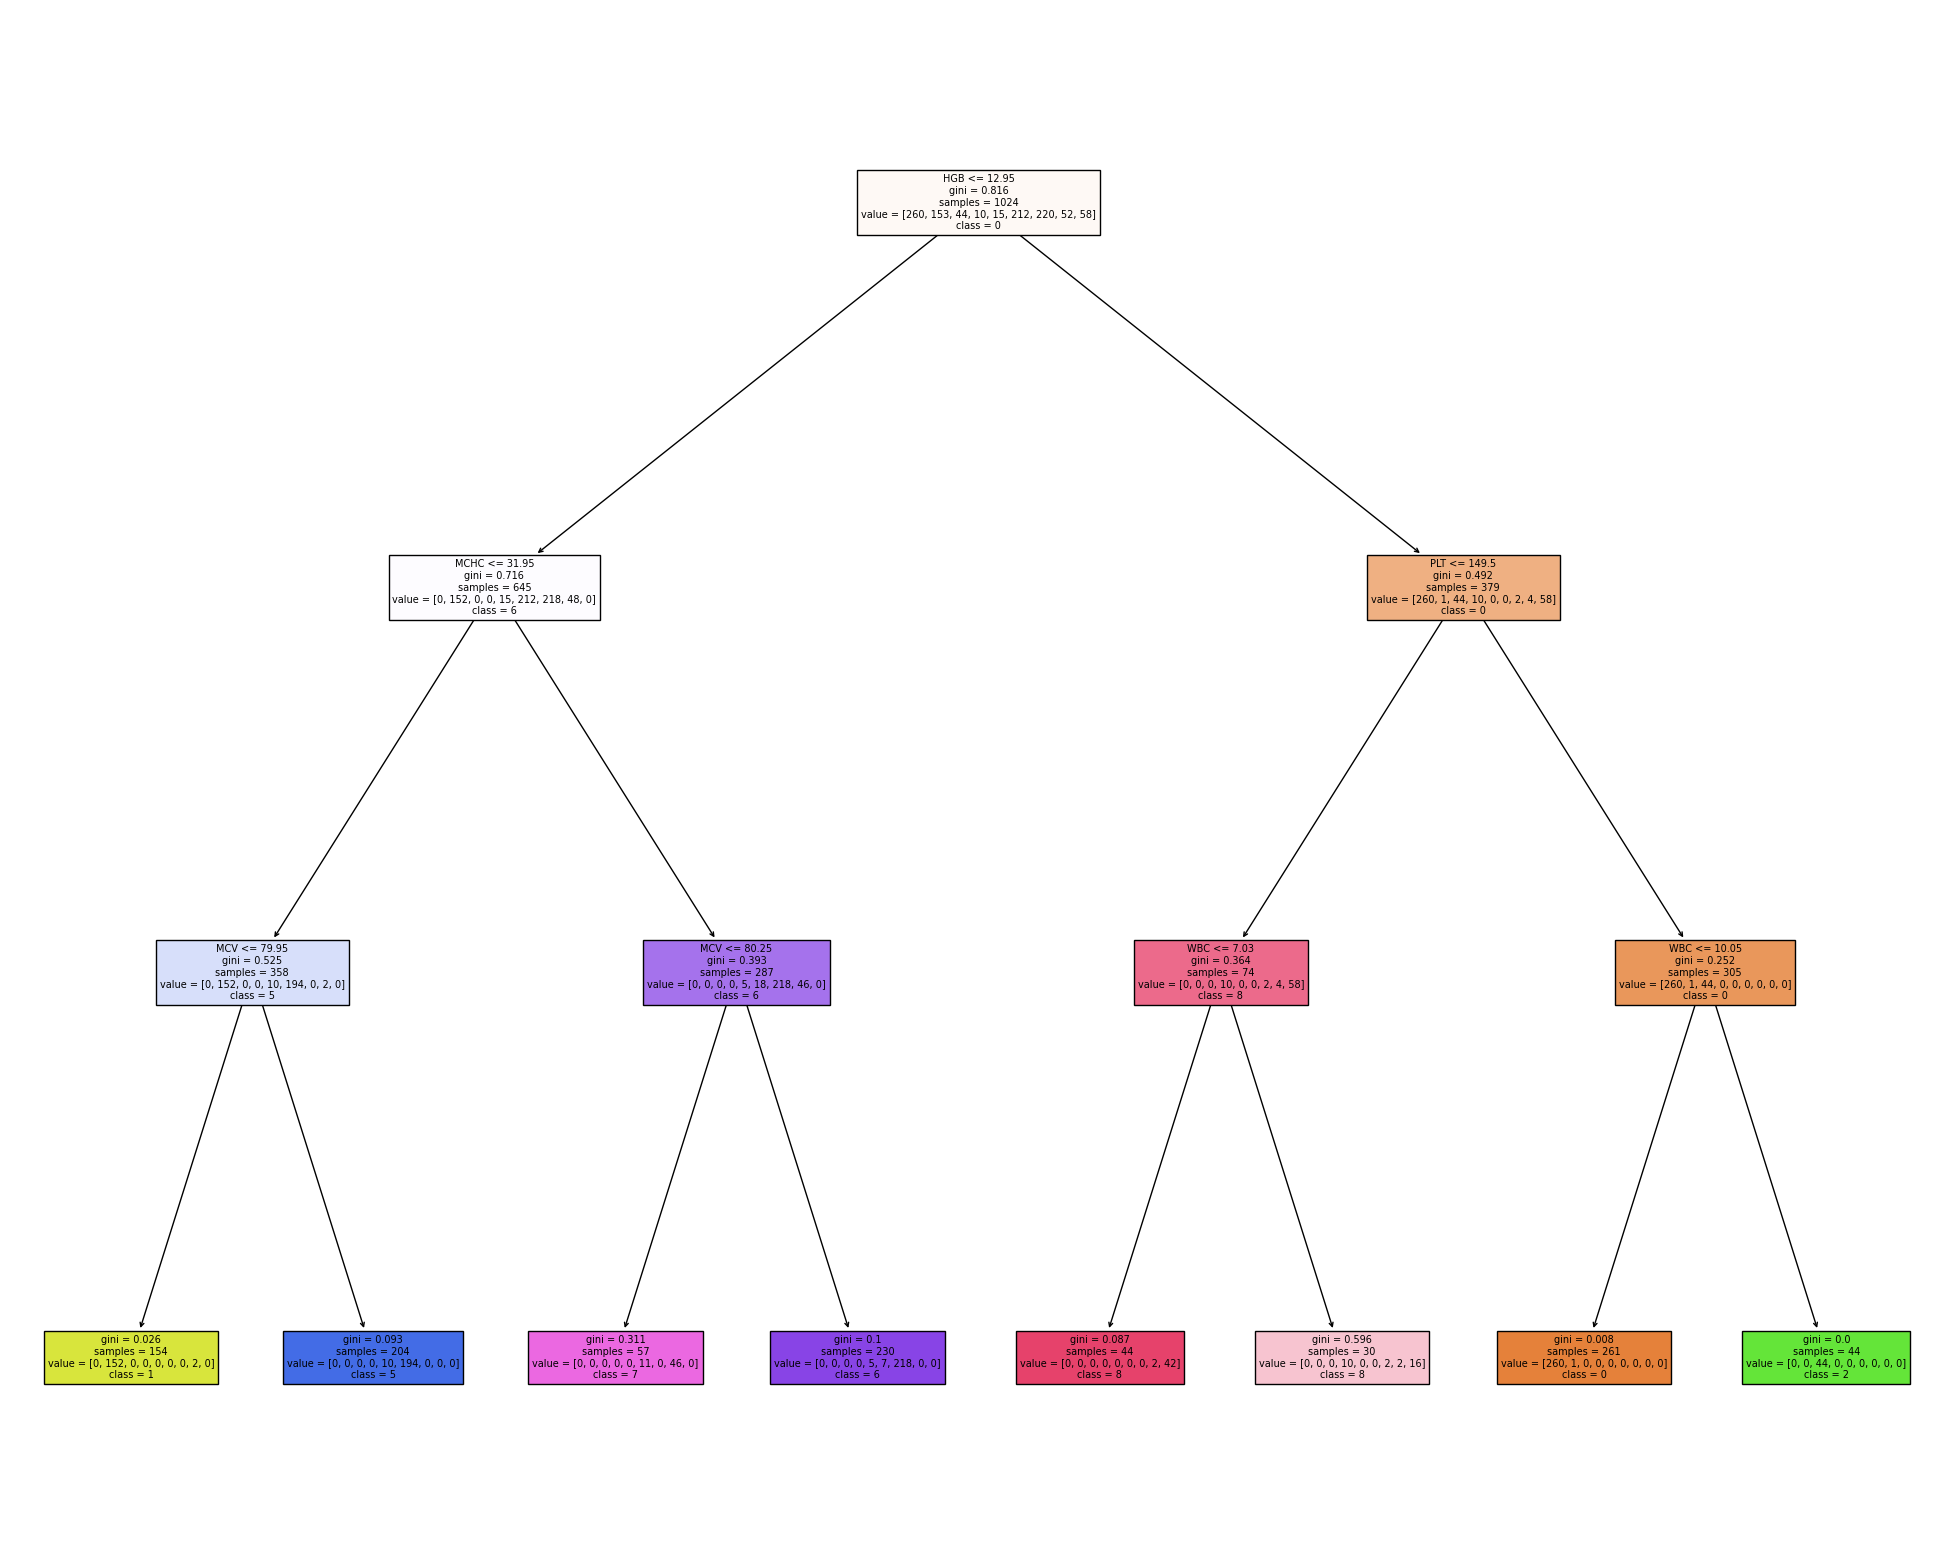

In [42]:
# visualize the tree

import matplotlib.pyplot as plt
from sklearn import tree

# features we used

fn = features

# labels of the target class

cn = ["0", "1", "2", "3", "4", "5", "6", "7", "8"]


fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(model, feature_names=fn, class_names=cn, filled=True)


#### *Journal:*


Alexandre Momparler, Pedro Carmona & Francisco Climent (2016):
Banking failure prediction: a boosting classification tree approach, Spanish Journal
of Finance and Accounting / Revista Española de Financiación y Contabilidad: https://core.ac.uk/download/pdf/84748673.pdf

# K-Means Clustering (Category 2)

## Basics

K-means clustering is unsupervised machine learning technique where the goal is to group in a sensible way (considering similiarities) individual data observations. Each data point is presented as a vector based on the features assigned to it. The data points don't need to be labeled (i.e. classified) in advance, hence the unsupervised notion of the method.  

## Advantages: The benefits of using this methodology

* Efficiency: K-means is than other clustering algorithms with its complexity of O(n*k*t) where n is the number of observations, k is number of clusters and t is iterations until convergence. This is much more efficient than Hierarchical clustering with its complexity of O(n*n*n)
* Simple Algorithm easy to code: the idea is to guess the centers of each cluster and then iterate until convergance
* Flexible: Works well different datasets regardless of size or type of data (financial, climate, etc.)

## Computation

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import sklearn
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import r2_score

In [44]:
import warnings
warnings.filterwarnings('ignore')

In [45]:
carbon_data = pd.read_csv('/content/carbon_data_df_daily.csv', delimiter = ',' )

In [46]:
carbon_data = carbon_data.set_index('Date')
carbon_data.index = pd.to_datetime(carbon_data.index, format='%d/%m/%Y')
carbon_data = carbon_data.sort_index()

In [47]:
carbon_data = carbon_data[carbon_data.index >= '2008-01-01']

In [48]:
def feature_normalize(dataset):
    mu = np.mean(dataset,axis = 0)
    sigma = np.std(dataset,axis = 0)
    return (dataset - mu)/sigma

In [49]:
carbon_data_norm = feature_normalize(carbon_data)

In [50]:
carbon_data_norm.head()

Carbon Price      Vol.       Oil  Coal Price       Gas       DAX
Date                                                                        
2008-01-02     -0.006525 -0.215019  1.149784    0.431048  2.120360 -0.655118
2008-01-03      0.018829 -0.144747  1.131008    0.427826  2.027099 -0.667449
2008-01-04      0.019238 -0.077128  1.076813    0.451185  2.115591 -0.697662
2008-01-07      0.023736 -0.033374  0.956475    0.495488  2.135727 -0.695092
2008-01-08      0.025372 -0.226952  1.009390    0.479378  2.182357 -0.685149

In [51]:
#choose only numerical data for correlation
columns_to_exclude = ['Vol.']
carbon_data_norm  = carbon_data_norm.drop(columns=columns_to_exclude)

In [52]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(carbon_data_norm)

In [53]:
column_names = carbon_data_norm.columns.tolist()

In [54]:
df_scaled = pd.DataFrame(scaled_data, columns=column_names, index=carbon_data_norm.index)

In [55]:
df_scaled = df_scaled.dropna()

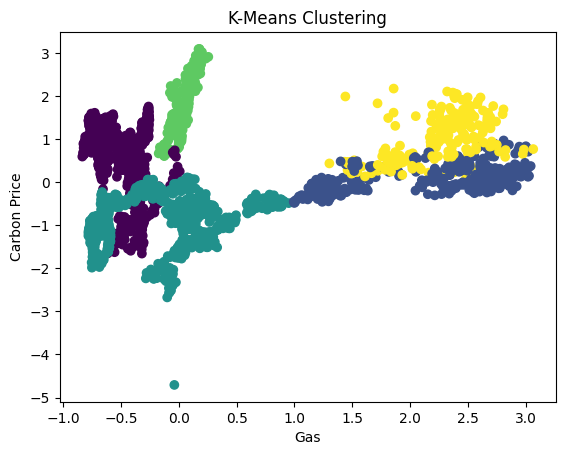

In [56]:
data_cluster = df_scaled.values
# Define the number of clusters
num_clusters = 5

# Initialize and fit the k-means model
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(data_cluster)

# Access the cluster labels
cluster_labels = kmeans.labels_

# Plotting the clustered data
plt.scatter(data_cluster[:, 0], data_cluster[:, 1], c=cluster_labels)
plt.xlabel('Gas')
plt.ylabel('Carbon Price')
plt.title('K-Means Clustering')
plt.show()

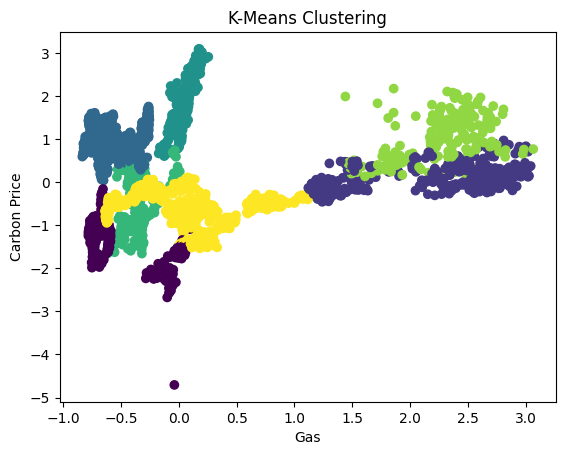

In [57]:
data_cluster = df_scaled.values
# Define the number of clusters
num_clusters = 7

# Initialize and fit the k-means model
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(data_cluster)

# Access the cluster labels
cluster_labels = kmeans.labels_

# Plotting the clustered data
plt.scatter(data_cluster[:, 0], data_cluster[:, 1], c=cluster_labels)
plt.xlabel('Gas')
plt.ylabel('Carbon Price')
plt.title('K-Means Clustering')
plt.show()

If you plot the error versus K (scree plot or elbow method), the number of clusters needed can be determined at the point where the curve is flattening out.

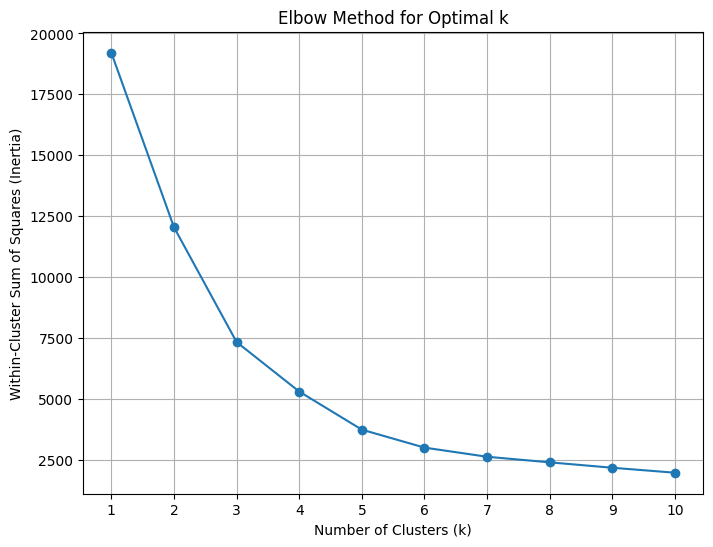

In [58]:
data_cluster = df_scaled.values

# Calculate the within-cluster sum of squares (inertia) for different values of k
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_cluster)
    inertias.append(kmeans.inertia_)

# Plot the Elbow Method curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

We can see here that after 5, there is not much of gain in within-clusters sum of squares. One would conclude that 5 is optimal number of clusters.

## Disadvantages: Difficulties or known issues with this methodology

---



* First of all,we have to pre-set the number of clusters to be created. There are different techniques to find out the optimal number of cluster, yet it is additional step to considered. Sometimes the number of clusters needed is obvious based on the nature of the data. If we are lucky it will be easy to conclude it just by using the elbow method. In the end it is possible also that some clusters are quite large whereas some other clusters include only a few datapoints (or even 1).
* Outliers can mess the final output. Scaling and delete outliers is advisable.
* Running the procedure several times can produce different results simply because the initial center of clusters is chosen randomly.

## Equations: Equations that summarize how the model works

Mathematically, the objective of the K-means algorithm is to minimize an objective function which in our case is a squared error function given by
$$J=\sum_{j=1}^k \sum_{i=1}^n ||x_i^{j} - C_j||^2$$
where

$$||x_i^{j} - C_j||^2$$
is the Euclidean distance between data points $x_i$ and the centroid $C_j$.

## Features: Features of the model (e.g., works well with missing values)

* It can handle high-dimensional data (eg. many features) and can perform relatilve good in problems where other methods suffer from the curse of dimensionality
* It might not be suitable for time-series data because the timestamp will not play a role in the model

## Guide: List of inputs and outputs

Input:
* Number of clusters
* The features matrix X

Output:
* Centroids of the clusters
* Classification for each datapoint (label)

## Hyperparameters: List of hyperparameters that need tuning

* Number of clusters
* Initialization method (random, k-means++)
* Number of iteration

## Illustration: Visuals (figures, flowcharts, graphs) that show HOW the model

*   List item
*   List item

works;

In [59]:
from IPython.display import Image
Image(url='https://miro.medium.com/v2/resize:fit:640/format:webp/0*cUBG_bvKvfqbLx3l')

##### Source: [ Haonan Wu, Jingyan Sun, Lingxiao Song, Ziyue Cheng, Learn K-Means and Hierarchical Clustering Algorithms in 15 minutes](https://medium.com/sfu-cspmp/learn-k-means-and-hierarchical-clustering-algorithms-in-15-minute-221661bbec9e)

In [60]:
from IPython.display import Image
Image(url='https://miro.medium.com/v2/resize:fit:1100/format:webp/1*nTG-saGqpWxe2ZDUX1GpLQ.jpeg')

In [61]:
## Source: https://towardsdatascience.com/the-artof-effective-visualization-of-multi-dimensionaldata-6c7202990c57

In [62]:
from IPython.display import Image
Image(url='https://c.mql5.com/2/3/Figure5_som__1.png')

## Journal: One reference to a journal article

https://www.researchgate.net/publication/379664052_Classifying_and_Analyzing_Physical_Activities_through_Heart_Rate_Variability_and_Other_Physical_Metrics_Using_Holter_Monitor_Data

Authors: Boyan Davidov, Boyan Markov, Simona Mircheva

This a paper that discusess different clustering methods beyond k-means and actually indicates that curse of dimensionality can be also an issue for k-means clustering when there are many features (52 features). Indeed k-means is good for big datasets but not huge. Methods like t-sne (t distributed stochastic neighbour embedding) and UMAP (Uniform Manifold Approximation and Projection) can solve issues with huge datasets when we have millions of datapoints.

## Keywords

In [63]:
#unsupervisedlearning #scree plot #centroids #Silhouette Analysis

# Principal Component Analysis (PCA)

## 1. Introduction

### 1.1 Basics

PCA is an unsupervised machine learning algorithm which helps in reducing the dimension of the dataset. Data Analysis becomes very difficult when we have large number of features for every instances in the dataset, this is called "Curse of Dimensionality", which is a huge problem since it increases the complexity of dataset and needs more computational power. PCA helps in reducing the dimension of dataset by choosing the weighted linear combination of original features  which corresponds the varinace in the dataset by some accepted degree.

### 1.2 Keywords

PCA, Unsupervised Learning, SVD, Eigen values, Eigen vectors, Principal Components, Dimension Reduction

## 2. Features of PCA

### 2.1 Advantages

Below are the advantages of using PCA-

*  Dimension reduction: PCA helps in reducing the dimension of the dataset by taking features which explains the most of the varience in the datatset.
*   Computaional Cost: PCA reduce the computational cost of the model by reducing the dimension of the dataset.
*   Data Visualization: PCA helps in visualizing the data. By reducing the dimension of dataset to 2D or 3D it helps visualize the high dimensional data upto some accuracy (depends upon PCA prisevation parameter)
*   Reduces the Overfitting: By reducing the features of dataset, PCA helps in reducing the overfitting problem.





### 2.2 Computaion

Below is example of computaion for PCA in Python.

In [64]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [65]:
# Step 2: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
X.shape
print(pd.DataFrame(X).head())

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


In [66]:
# Step 3: Standardize the data
X_standardized = StandardScaler().fit_transform(X)

In [67]:
# Step 4: Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
principal_components = pca.fit_transform(X_standardized)

In [68]:
# Step 5: Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['target'] = y

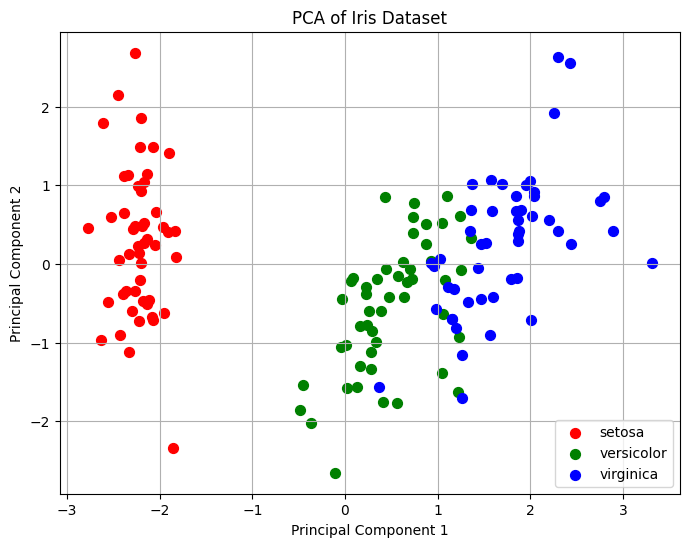

In [69]:
# Step 6: Visualize the results
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
for target, color in zip([0, 1, 2], colors):
    indices_to_keep = df_pca['target'] == target
    plt.scatter(df_pca.loc[indices_to_keep, 'PC1'], df_pca.loc[indices_to_keep, 'PC2'], c=color, s=50)
plt.legend(target_names)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.grid()
plt.show()

### 2.3 Disadvantages:

PCA helps with the most common problem od data analyis which is "Curse of Dimenstinality", but it also have some disadvangates, which are -


*   Linear Assumption: PCA assumes that the calcualted principal components are in linear combinations of original features, which may ignores the non-linear or more complex combinations.
*   Standarization required: PCA involves a intermidiate step of making data standard or noramlize with mean 0 and variance 1. PCA is sensitive to the standardization process. Without this step PCA leads to some incorrect results.
*   Interpertaion: PCA is hard to interperate since they are linear combination of some original features which holds the highest variences.
*   Loss of Information: By reducing the dimension, PCA definately losses the information.
*   Computational Cost: It the dataset is huge, PCA require high compuational power and momery to run the model.
*   If the number of instances in the dataset are less than the features, it is generally recommended not to use the PCA because it losses informations.







### 2.4 Equations

In the documents attached.

### 2.5 Features

Below are the features of the PCA:


*   PCA reduces the dimension of the dataset which helps in understaing the dataset by looking the main freatures which shows the highest variance.
*   PCA are good with large dataset but if dataset is very large it may cost more computaional power and memory. To tackle this challenge we can use IPCA (Implemented PCA) which splits the large dataset into mini-batchs to fit the avialable memory space. We can also use Randomized PCA which uses the stochastic algorithm "randomized PCA" that quickly finds an approximation of d (dimension from PCA which preserves the required variance).
*   PCA is uses the SVD method and useful to understand the SVD at greater extend for some dataset matries.
*   We can perform Inverse Transformation to retrive the original data from PCA dataset and since the PCA does not preserve the data completley this trasformated data may not be completly same as original unless we use all the Principal components in the first place.





### 2.6 Guide


 Input :
*  X : Original Dataset with m instances and n features => $X_{{m}x{n}} $
*  d : reduced dimension
*  Percentage preserve : we can use percentage preserve which states to the model to preserve the data upto this percentage. Alternative to the d parameter.

Output:
*   List of Principal components with there linear combinations of original featrures.
*   Loading for each feature for each princpal component.
*   Percentage of variance explained by each princpal compoents.










### 2.7 Hyperparameters

Below are the hyperparameters that need tuning in PCA:


*   d : dimension, PCA doesn't know upto which point we need the princpal compoents to preserve data, PCA automatically gives n Principal companents where n is number of original features in our dataset by presering all the variance in the dataset. we can tune the d hyperparameter according to over need and which can be done by the help of Elbow curve.
*   We can tune the hyperparameter which is reponsible for using the differnet PCA methods under SVD method. For Example, Randomaized PCA, Implimentaed PCA,etc.
*   We can also tune the hyperparameter which if valued to True results in giving the princpal componets with the unit variance.






### 2.8 Illustrtion

In [70]:
from IPython.display import Image
Image(url='https://images.prismic.io/turing/659810b6531ac2845a272989_p_CA_1_071c277c7e.png?auto=format,compress')

### Source [Dharani , https://www.turing.com/kb/guide-to-principal-component-analysis]

In [71]:
from IPython.display import Image
Image(url='https://media.geeksforgeeks.org/wp-content/uploads/20230420165431/Principal-Componenent-Analysisi.webp')

### Source [2023, Aishwarya, Principal Component Analysis(PCA) , https://www.geeksforgeeks.org/principal-component-analysis-pca/]

### 2.9 Journal:

Ian T. Jolliffe and Jorge Cadima, (Jan 2016) , Principal component analysis: a review and recent developments.

Link : https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4792409/

This article summerize the PCA in very subjective manner which is very easy for a layman to understand and use. This also talks about new development in the area of PCA research, since its 2016 published aricle these are not that much new but still helps to understand the PCA model.

In [72]:
###

## **Step 3**

The classification tree model has several hyperparameters.

By changing the hyperparameters (finding the best set) we

can obtain better results in searching good model.

For example, we can sequentially change the maximum depth the tree may grow (max_depth).

There are three widely-used methods in searching the optimal hyperparameters:

- Grid search
- Random search
- Bayesian optimization

In our case we will use Grid search method.

In [73]:
# Importing the library
from sklearn.model_selection import GridSearchCV

In [74]:
# Creating the sets of hyperparameters
parameters = {
    'criterion': ["gini", "entropy"],
    'max_depth': [2, 3, 4, 5, 10, 15, 20],
    'min_samples_split': [2, 4, 5, 10, 15],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2, 5, 10]
}

In [75]:
# Grid Search model
grid_search = GridSearchCV(estimator = model,
                           param_grid=parameters,
                           cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")

In [76]:
# Fitting the grid search model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1050 candidates, totalling 5250 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=3, min_samples_leaf=30),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 10, 15, 20],
                         'max_features': [2, 5, 10],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [2, 4, 5, 10, 15]},
             scoring='accuracy', verbose=1)

In [77]:
# Getting the score results
scores = pd.DataFrame(grid_search.cv_results_)
scores.head(2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.006810      0.001593         0.003373        0.000316   
1       0.005265      0.000346         0.003724        0.000645   

  param_criterion param_max_depth param_max_features param_min_samples_leaf  \
0            gini               2                  2                      5   
1            gini               2                  2                      5   

  param_min_samples_split                                             params  \
0                       2  {'criterion': 'gini', 'max_depth': 2, 'max_fea...   
1                       4  {'criterion': 'gini', 'max_depth': 2, 'max_fea...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.609756           0.565854           0.360976           0.365854   
1           0.663415           0.360976           0.556098           0.580488   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.534314         0.487351        0.104003             1038  
1           0.500000         0.532195        0.100474             1008

In [78]:
scores.nlargest(3, "mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
802        0.008290      0.000249         0.003129        0.000162   
502        0.007210      0.000084         0.002956        0.000097   
1034       0.008087      0.000300         0.002876        0.000144   

     param_criterion param_max_depth param_max_features  \
802          entropy               5                 10   
502             gini              20                 10   
1034         entropy              20                 10   

     param_min_samples_leaf param_min_samples_split  \
802                       5                       5   
502                       5                       5   
1034                     10                      15   

                                                 params  split0_test_score  \
802   {'criterion': 'entropy', 'max_depth': 5, 'max_...           0.975610   
502   {'criterion': 'gini', 'max_depth': 20, 'max_fe...           0.970732   
1034  {'criterion': 'entropy', 'max_depth': 20, 'max...           0.970732   

      split1_test_score  split2_test_score  split3_test_score  \
802            0.995122           0.995122           0.985366   
502            0.980488           0.990244           0.975610   
1034           0.975610           0.990244           0.980488   

      split4_test_score  mean_test_score  std_test_score  rank_test_score  
802            0.985294         0.987303        0.007305                1  
502            0.980392         0.979493        0.006469                2  
1034           0.975490         0.978513        0.006628                3

In [79]:
# Obtaining the best set of hyperparameters
best = grid_search.best_estimator_
best

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=10,
                       min_samples_leaf=5, min_samples_split=5)

## **Step 4**

#### The basic features and advantages:

#### *Features:*

- The model can be used to get only qualitative results
- Resembles the human desicion-making process (reasoning, logic)
- Ability to handle numerical and categorical data
- Dealing with missing values and nonlinear relationships
- Robust to outliers

#### *Advantages:*

- The classification trees models have common feature: their results can be easily explained to other people (non-experts).
- The classification tree can be plotted and hence easily interpreted.
- Another good feature is that such models can devide the data non-linearly when searching for best trees (in comparison with some linear models).
- The model can use qualitative features without say one-hot-encoding or ordinary-incoding the features.


The main advantage of classification tree model is an ability to easily interprete its results. There are many fuilds where the classification tree models can be used: in medicine to detect the disease of patients who have certain characteristics. In this case for example doctors definitely need well-interpreted results to make decisions as they don't have mathemitical or statistical background. In web to identify spam, in computer vision to indentify characters, in unmanned vehicle systems to identify object and so on.

As has been mentioned ealier the classification tree model can handle non-linear relationship in dataset. And in comparison with linear regression models this feature definitly makes classification tree much more preferable.

While modeling classification tree we can obtain very simple model through prunning. This model will have a generalization charateristics and at the same time will be robust. As a result with classification tree model having only several levels one can easily explain it to other people and integrate the obtained rules to some system for future usage.



In [80]:
# Colab2PDF v1.0.4 by Drengskapur (github.com/drengskapur/colab2pdf) (License: GPL-3.0-or-later)
# @title {display-mode:"form"}
# @markdown ⬇️ Download PDF
def colab2pdf():
    ENABLE=True # @param {type:"boolean"}
    if ENABLE:
        !apt-get install librsvg2-bin
        import os, datetime, json, locale, pathlib, urllib, requests, werkzeug, nbformat, google, yaml, warnings
        locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
        NAME = pathlib.Path(werkzeug.utils.secure_filename(urllib.parse.unquote(requests.get(f"http://{os.environ['COLAB_JUPYTER_IP']}:{os.environ['KMP_TARGET_PORT']}/api/sessions").json()[0]["name"])))
        TEMP = pathlib.Path("/content/pdfs") / f"{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}_{NAME.stem}"; TEMP.mkdir(parents=True, exist_ok=True)
        NB = [cell for cell in nbformat.reads(json.dumps(google.colab._message.blocking_request("get_ipynb", timeout_sec=600)["ipynb"]), as_version=4).cells if "--Colab2PDF" not in cell.source]
        warnings.filterwarnings('ignore', category=nbformat.validator.MissingIDFieldWarning)
        with (TEMP / f"{NAME.stem}.ipynb").open("w", encoding="utf-8") as nb_copy: nbformat.write(nbformat.v4.new_notebook(cells=NB or [nbformat.v4.new_code_cell("#")]), nb_copy)
        if not pathlib.Path("/usr/local/bin/quarto").exists():
            !wget -q "https://quarto.org/download/latest/quarto-linux-amd64.deb" -P {TEMP} && dpkg -i {TEMP}/quarto-linux-amd64.deb > /dev/null && quarto install tinytex --update-path --quiet
        with (TEMP / "config.yml").open("w", encoding="utf-8") as file: yaml.dump({'include-in-header': [{"text": r"\usepackage{fvextra}\DefineVerbatimEnvironment{Highlighting}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines,breakanywhere,commandchars=\\\{\}}"}],'include-before-body': [{"text": r"\DefineVerbatimEnvironment{verbatim}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines}"}]}, file)
        !quarto render {TEMP}/{NAME.stem}.ipynb --metadata-file={TEMP}/config.yml --to pdf -M latex-auto-install -M margin-top=1in -M margin-bottom=1in -M margin-left=1in -M margin-right=1in --quiet
        google.colab.files.download(str(TEMP / f"{NAME.stem}.pdf"))
colab2pdf()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  librsvg2-bin
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 1,871 kB of archives.
After this operation, 6,019 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 librsvg2-bin amd64 2.52.5+dfsg-3ubuntu0.2 [1,871 kB]
Fetched 1,871 kB in 1s (1,314 kB/s)
Selecting previously unselected package librsvg2-bin.
(Reading database ... 121913 files and directories currently installed.)
Preparing to unpack .../librsvg2-bin_2.52.5+dfsg-3ubuntu0.2_amd64.deb ...
Unpacking librsvg2-bin (2.52.5+dfsg-3ubuntu0.2) ...
Setting up librsvg2-bin (2.52.5+dfsg-3ubuntu0.2) ...
Processing triggers for man-db (2.10.2-1) ...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>